Python version 2.7.10 (default, Feb 22 2019, 21:55:15) 
[GCC 4.2.1 Compatible Apple LLVM 10.0.1 (clang-1001.0.37.14)]
Pandas version 0.23.3
Matplotlib version 2.2.2


func
EGO_GET_RESOURCE_PLAN              1740
EGO_PERMISSION_CHECK                469
EGO_PERMISSION_FOR_USER_REQ        1740
EGO_RBACROLES_GETROLEID_REQ           3
EGO_RBACROLES_INFO_REQ               32
EGO_RBACROLES_USER_INDIRECT_REQ       5
EGO_RBACROLES_USER_REQ             1740
EGO_SET_RESOURCE_PLAN                16
EGO_UPDATE_USERS_RBACROLE_REQ         3
EGO_USERS_USERGROUP_INFO_REQ         20
EGO_USER_RBACROLES_INDIRECT_REQ    1737
PEM_STARTUP_REQ                     296
PEM_SYN_ACK                         299
VEM_ACTIVATE_HOST                   569
VEM_ALLOC_FREE                        2
VEM_ALLOC_INFO_MD                  1059
VEM_ALLOC_REQ                        24
VEM_ARRAY_PERMISSION_CHECK         1740
VEM_CLIENT_INFO                       1
VEM_CLIENT_LOCATE                  1740
VEM_CLIENT_REGISTER                1740
VEM_CLIENT_REGISTER3                 32
VEM_CLIENT_REGISTER_MD                1
VEM_CLIENT_SYNC                    1740
VEM_CLIENT_UNREGISTER              

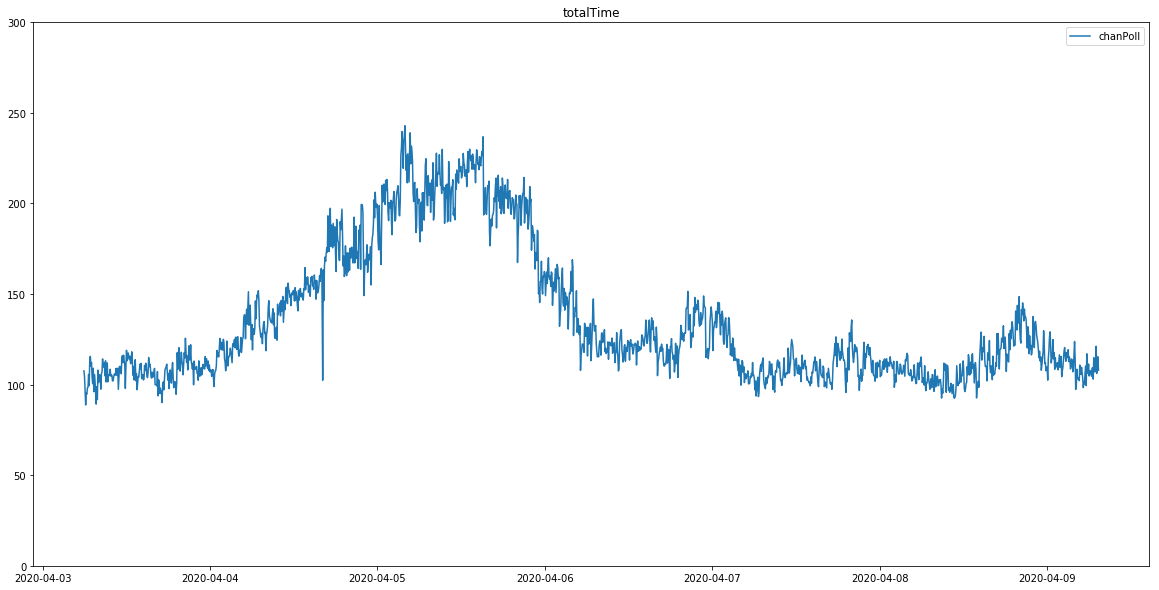

In [3]:
import pandas as pd
import os
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import matplotlib.pyplot as plt
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Location = r'/Users/yudowang/Downloads/vemkd.log.cbbeep1-a1.svr.emea.jpmchase.net'
df=pd.read_table(Location, sep='\n', names=['line'], header=None, error_bad_lines=False)
df.size
df['line']=df['line'].str.replace('<', '').str.replace('>', '').str.replace('[', '').str.replace(']', '')
if os.path.exists('vemkd.csv'):
    os.remove('vemkd.csv')
df[df['line'].str.contains('printPerf')].to_csv('vemkd.csv',index=False,header=False)
col72 = ['Date', 'Time', 'Pid', 'OpCode', 'totalCnt', 'totalTime', 'maxTime', 'minTime', 'totalFileIO', 'maxFileIO', 'minFileIO', 'totalIOCounter', 'totalChanOpenTime', 'maxChanOpenTime', 'minChanOpenTime', 'func']
File = r'vemkd.csv'
df=pd.read_table(File, sep=' ', header=None, names=col72, usecols=[0,1,4,8,10,12,14,16,18,20,22,24,26,28,30,32], error_bad_lines=False, parse_dates=[[0, 1]], index_col=0)
df.head()
date_time_func = df.reset_index().groupby(['func','Date_Time']).sum()
date_time_func.head()
date_time_func.index.levels[0]
date_time_func.index.levels[1]

plt.figure(figsize=(20,10))
plt.ylim(0, 300)
plt.title('totalTime')
plt.plot(date_time_func.loc['chanPoll']['totalTime'], label='chanPoll')
plt.legend()
function = df.groupby('func')
function['totalTime'].mean().sort_values(ascending=False).head(5)
function.size()

In [4]:
num = len(function.get_group('chanPoll'))
newdf = function.filter(lambda x: len(x)==num)
newdf.groupby('func').size()
newfunction = newdf.groupby('func')
newfunction['totalTime'].mean().sort_values(ascending=False).head(5)

func
chanPoll                 135.463237
distribute               130.215904
VEM_CONTAINER_INFO         6.113448
VEM_LOGON                  5.202611
EGO_GET_RESOURCE_PLAN      4.504866
Name: totalTime, dtype: float64

['chanPoll', 'distribute', 'VEM_CONTAINER_INFO', 'VEM_LOGON', 'EGO_GET_RESOURCE_PLAN']


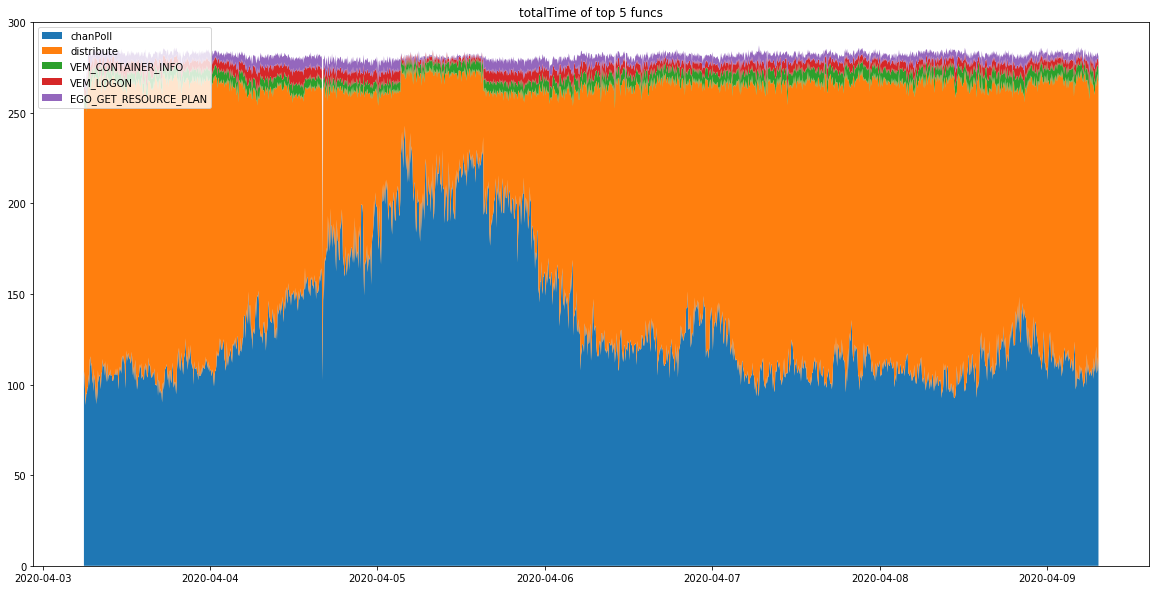

In [5]:
s = newfunction['totalTime'].mean().sort_values(ascending=False).head(5).index

la = []
for i in range(0, 5):
    la.append(s[i])
    
print la

new_date_time_func = newdf.reset_index().groupby(['func','Date_Time']).sum()

y = []
for x in s:
    y.append(new_date_time_func.loc[x]['totalTime'])
    
plt.figure(figsize=(20,10))
plt.ylim(0, 300)
plt.title('totalTime of top 5 funcs')
x = newfunction.get_group('chanPoll').index
plt.stackplot(x, y, labels=la)
plt.legend(loc='upper left')